In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e3/sample_submission.csv
/kaggle/input/playground-series-s4e3/train.csv
/kaggle/input/playground-series-s4e3/test.csv


In [2]:
import xgboost
from sklearn.model_selection import train_test_split

# Load data

In [3]:
path_train_path = '/kaggle/input/playground-series-s4e3/train.csv'
path_test_path = '/kaggle/input/playground-series-s4e3/test.csv'
path_submission = '/kaggle/input/playground-series-s4e3/sample_submission.csv'

submit_df = pd.read_csv(path_submission)
submit_df

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,19220,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,19221,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,19222,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,19223,0.5,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...,...
12809,32028,0.5,0.5,0.5,0.5,0.5,0.5,0.5
12810,32029,0.5,0.5,0.5,0.5,0.5,0.5,0.5
12811,32030,0.5,0.5,0.5,0.5,0.5,0.5,0.5
12812,32031,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [4]:
orig_train_df = pd.read_csv(path_train_path,index_col ='id')
orig_train_df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
id,,,,,,,,,,,,,,,,,,,,,
0,584,590,909972,909977,16,8,5,2274,113,140,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,808,816,728350,728372,433,20,54,44478,70,111,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,781,789,3353146,3353173,210,16,29,3202,114,134,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,1540,1560,618457,618502,521,72,67,48231,82,111,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,749,757,143210,143219,17,4,4,2193,122,140,...,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0
19215,723,735,2488529,2488541,231,17,26,27135,104,133,...,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1
19216,6,31,1578055,1578129,780,114,98,71112,41,94,...,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0


In [5]:
orig_test_df = pd.read_csv(path_test_path,index_col ='id')
orig_test_df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
id,,,,,,,,,,,,,,,,,,,,,
19219,1015,1033,3826564,3826588,659,23,46,62357,67,127,...,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172
19220,1257,1271,419960,419973,370,26,28,39293,92,132,...,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104
19221,1358,1372,117715,117724,289,36,32,29386,101,134,...,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514
19222,158,168,232415,232440,80,10,11,8586,107,140,...,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051
19223,559,592,544375,544389,140,19,15,15524,103,134,...,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32028,1101,1116,447943,447992,313,32,37,21603,79,103,...,0.0126,0.4063,0.9194,1.0,2.4955,1.2305,1.6335,0.7661,-0.3109,0.8894
32029,1289,1306,3149494,3149542,59,9,18,5249,113,141,...,0.0052,0.7778,1.0000,1.0,1.7708,0.8451,1.2553,0.7222,-0.0448,0.1954
32030,41,210,1587535,1587191,16584,796,522,1858162,24,143,...,0.1236,0.2199,0.4097,0.0,4.2525,2.2504,2.2672,-0.0629,-0.0801,1.0000


In [6]:
target_cols = list(set(orig_train_df) - set(orig_test_df))
target_cols

['Other_Faults',
 'Z_Scratch',
 'Dirtiness',
 'Stains',
 'Bumps',
 'K_Scatch',
 'Pastry']

# EDA

In [7]:
orig_train_df.isna().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [8]:
all_columns = orig_train_df.columns 

for col in all_columns:
    lengts = len(orig_train_df[col].unique())
    print(col,f"{lengts} : " ,orig_train_df[col].unique(),'\n================================')

X_Minimum 1191 :  [584 808  39 ... 650  40 792] 
X_Maximum 1259 :  [ 590  816  192 ...  810  748 1657] 
Y_Minimum 3345 :  [ 909972  728350 2212076 ... 2844229  658448  143210] 
Y_Maximum 3341 :  [ 909977  728372 2212144 ... 5521709  658502 1445996] 
Pixels_Areas 1154 :  [   16   433 11388 ...  3286   496  3872] 
X_Perimeter 460 :  [   8   20  705   16   72   22   21   38   25    6   37   27   12   14
  302  865  626   28   10   30  131   19  745   17   13  192   43  102
   18   42   50   61  252   47  696   33   11   57  182   15  257    9
   31  263  247  175   26   99   36  639  188   56   29  276   53   48
  178  275  126  161   23  699  307   35   24  796  675   51   90   40
  805    7  274   32   49   91   97  106   98   54  268  173   58  262
  670   68  578   39   63   67  266  239   44  196  269  562  174  251
  277   46  216   96  332  614  310  320  324  297  249    5  232  288
  821  611  755  572  222  198  265  682  107  179  976  118  618  109
  278  253  622   73   59  7

In [9]:
orig_train_df.dtypes

X_Minimum                  int64
X_Maximum                  int64
Y_Minimum                  int64
Y_Maximum                  int64
Pixels_Areas               int64
X_Perimeter                int64
Y_Perimeter                int64
Sum_of_Luminosity          int64
Minimum_of_Luminosity      int64
Maximum_of_Luminosity      int64
Length_of_Conveyer         int64
TypeOfSteel_A300           int64
TypeOfSteel_A400           int64
Steel_Plate_Thickness      int64
Edges_Index              float64
Empty_Index              float64
Square_Index             float64
Outside_X_Index          float64
Edges_X_Index            float64
Edges_Y_Index            float64
Outside_Global_Index     float64
LogOfAreas               float64
Log_X_Index              float64
Log_Y_Index              float64
Orientation_Index        float64
Luminosity_Index         float64
SigmoidOfAreas           float64
Pastry                     int64
Z_Scratch                  int64
K_Scatch                   int64
Stains    

In [10]:
orig_train_df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,19219.000000,...,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,128.647380,...,0.102742,-0.138382,0.571902,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,14.196976,...,0.487681,0.120344,0.332219,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,39.000000,...,-0.988400,-0.885000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,124.000000,...,-0.272700,-0.192500,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,127.000000,...,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,135.000000,...,0.529400,-0.084000,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,253.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


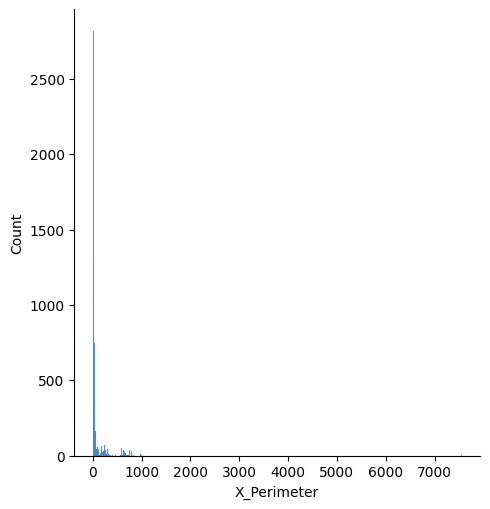

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


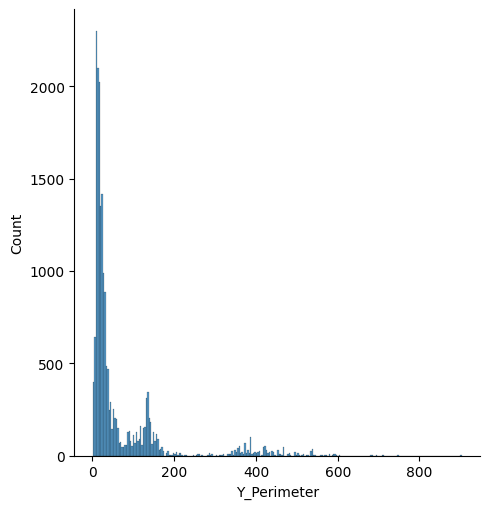

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


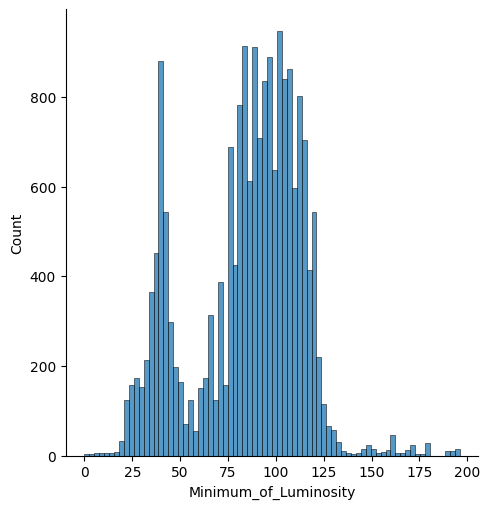

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


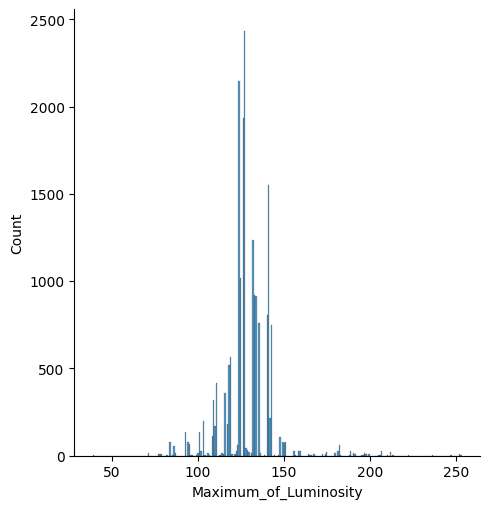

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


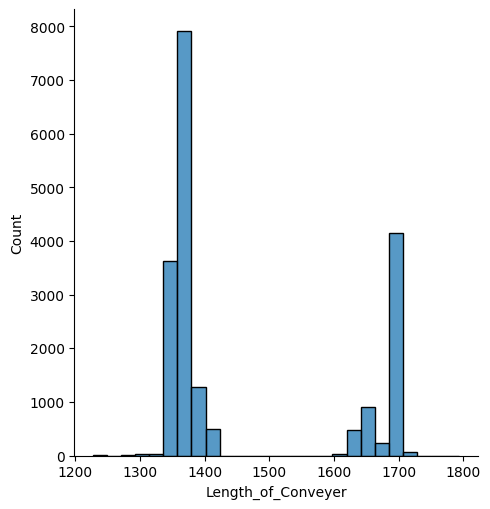

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


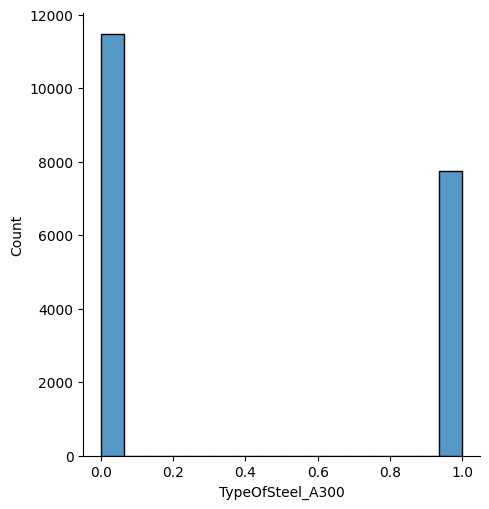

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


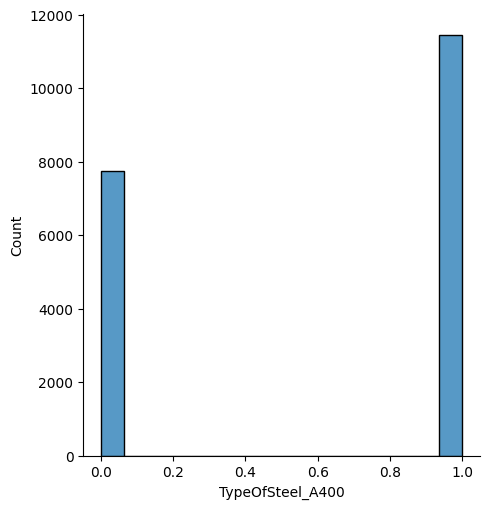

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


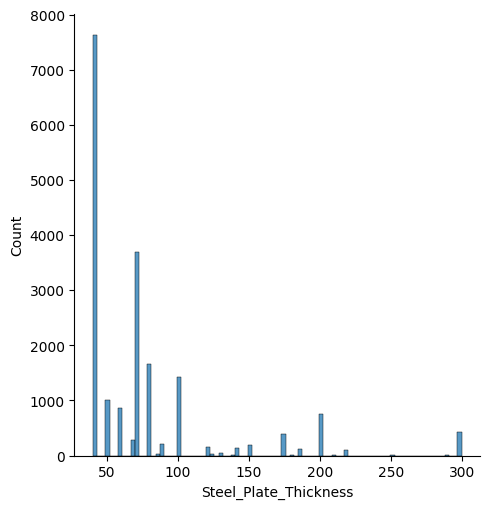

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


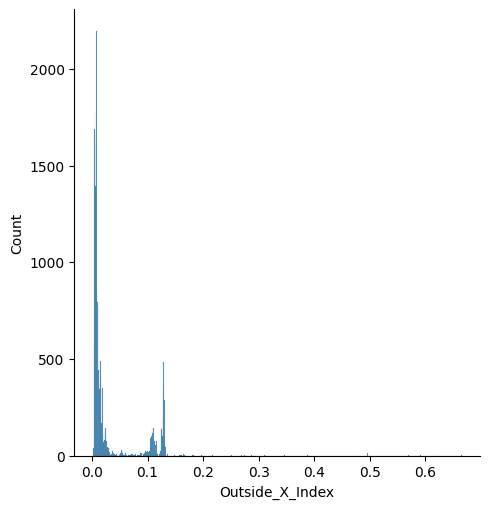

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


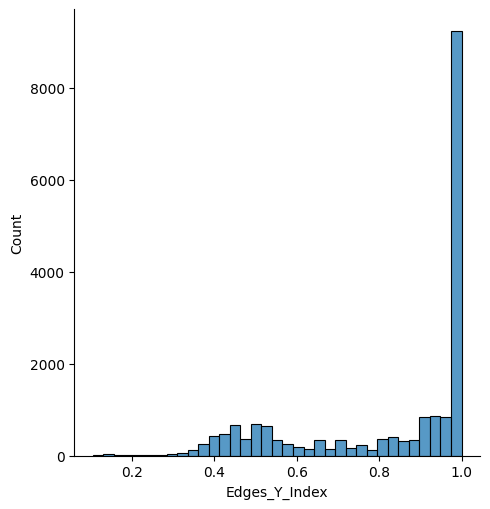

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


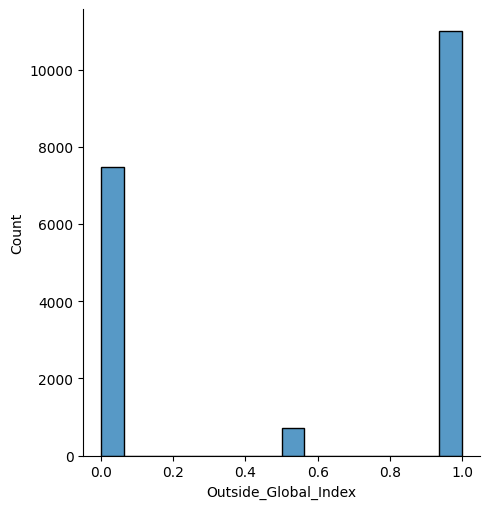

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


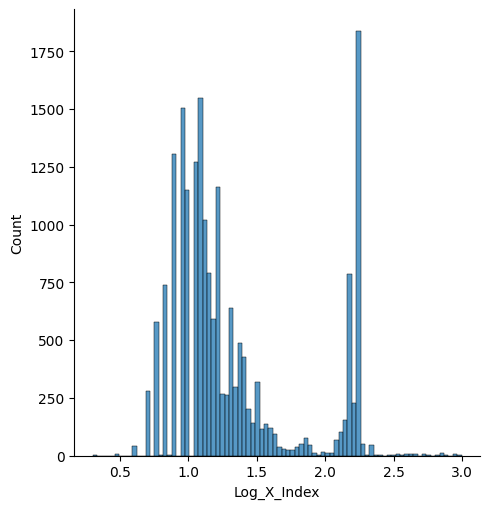

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


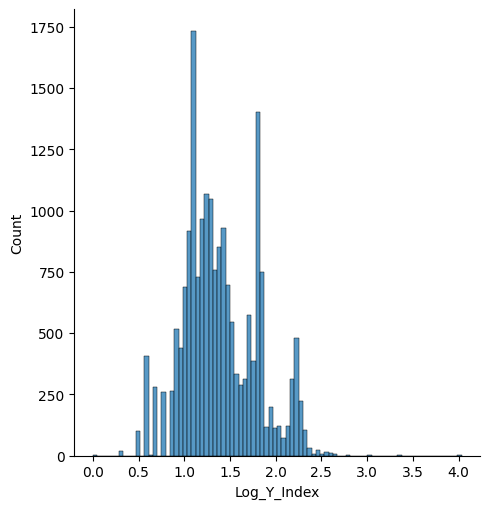

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


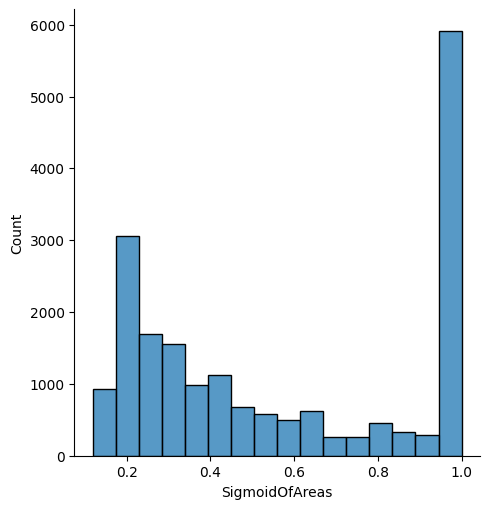

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


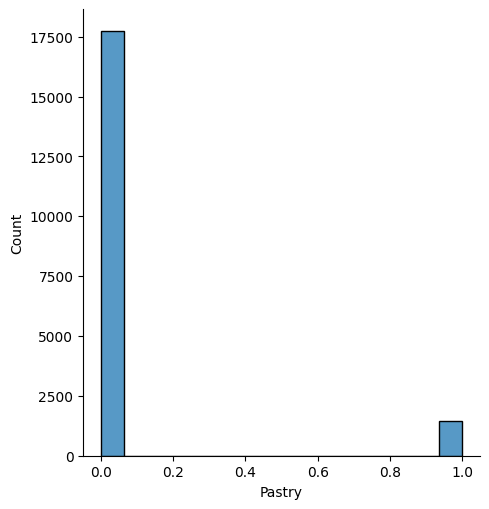

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


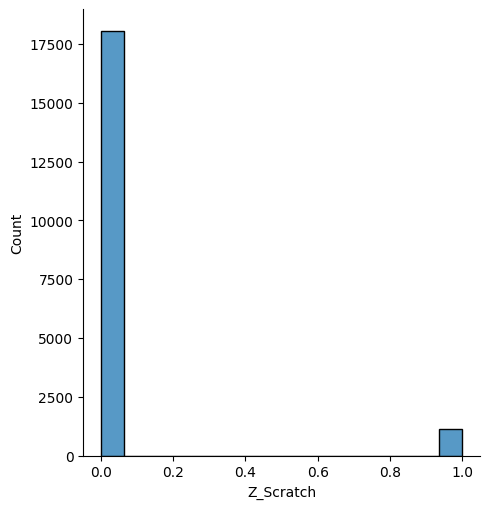

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


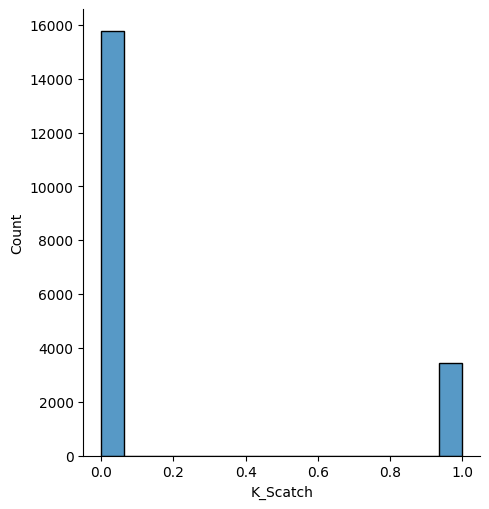

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


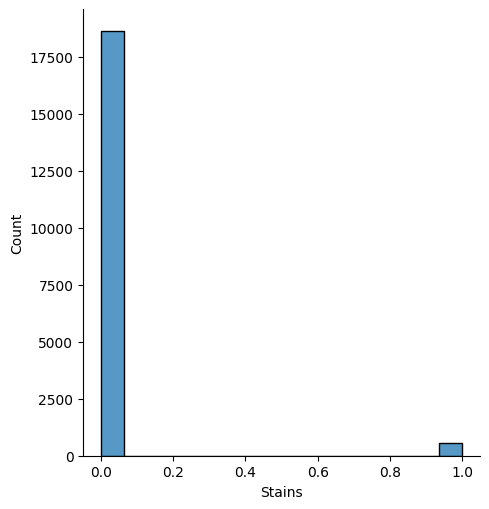

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


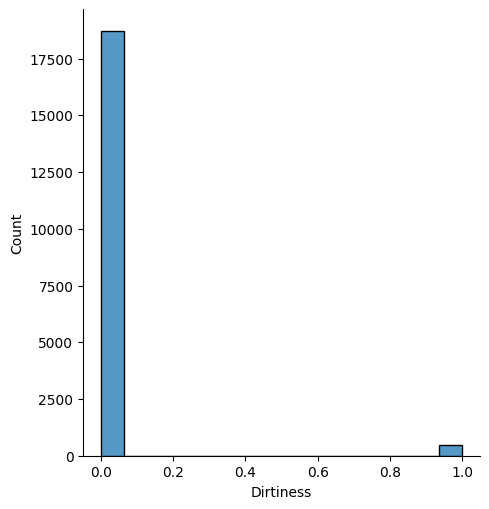

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


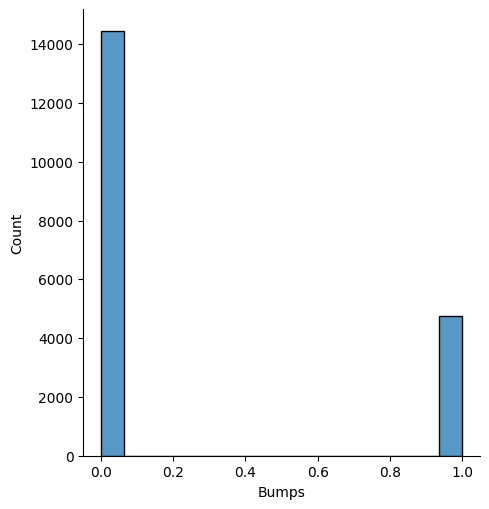

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


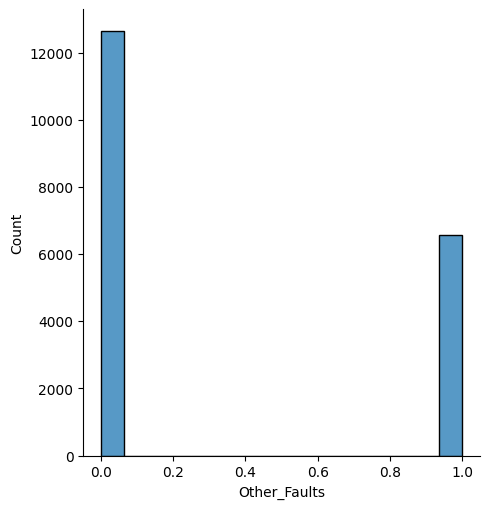

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt 
for col in all_columns:
    datas = orig_train_df[col].values
    if len(np.unique(datas)) > 1000: continue
    sns.displot(datas,)
    plt.xlabel(col)
    plt.show()

# Data Processing

In [12]:
train_df = orig_train_df.copy() 
len(np.unique(datas))

2

In [13]:

x_orig = train_df.drop(target_cols,axis=1)
y = train_df[target_cols]
x = x_orig.copy()
x

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
id,,,,,,,,,,,,,,,,,,,,,
0,584,590,909972,909977,16,8,5,2274,113,140,...,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417
1,808,816,728350,728372,433,20,54,44478,70,111,...,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,...,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000
3,781,789,3353146,3353173,210,16,29,3202,114,134,...,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025
4,1540,1560,618457,618502,521,72,67,48231,82,111,...,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,749,757,143210,143219,17,4,4,2193,122,140,...,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901
19215,723,735,2488529,2488541,231,17,26,27135,104,133,...,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378
19216,6,31,1578055,1578129,780,114,98,71112,41,94,...,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997


In [14]:
y

,Other_Faults,Z_Scratch,Dirtiness,Stains,Bumps,K_Scatch,Pastry
id,,,,,,,
0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
19214,0,0,0,1,0,0,0
19215,1,0,0,0,0,0,0
19216,0,0,0,0,0,0,1


In [15]:
from sklearn.preprocessing import StandardScaler

# Assuming you have your data in a NumPy array called 'data'
scaler = StandardScaler()

# Fit the scaler to the data (calculate mean and standard deviation)
# This step learns the scaling parameters without modifying the data
scaler.fit(x)

# Transform the data using the fitted scaler (subtract mean, divide by standard deviation)
x = pd.DataFrame(scaler.transform(x),columns=x.columns)
x

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,-0.236778,-0.327831,-0.493713,-0.493938,-0.447155,-0.492949,-0.585088,-0.428885,0.978888,0.799671,...,-0.522389,1.732355,0.761892,-1.227910,-1.669010,-0.875450,-1.703257,-1.235969,1.063494,-1.294971
1,0.184647,0.124329,-0.589127,-0.589709,-0.335365,-0.425464,-0.100187,-0.333403,-0.514188,-1.243070,...,-0.554101,-1.640168,0.761892,0.846618,0.214350,-1.142425,0.844958,1.310641,-1.340511,1.135420
2,-1.262119,-1.124112,0.190344,0.192770,2.601456,3.426816,3.521726,2.532830,-1.937820,0.870111,...,1.629799,-1.701772,-2.018246,-1.227910,2.081276,1.851790,2.021418,-0.232212,0.365477,1.288636
3,0.133850,0.070310,0.789801,0.794500,-0.395147,-0.447959,-0.347586,-0.426785,1.013611,0.377035,...,-0.554101,-1.078081,0.449619,0.846618,-0.198900,-1.142425,0.102736,1.156438,0.815864,-0.509925
4,1.561802,1.612854,-0.646859,-0.647650,-0.311774,-0.133028,0.028460,-0.324913,-0.097516,-1.243070,...,-0.241209,-1.817787,0.698985,0.846618,0.389091,0.218738,1.210891,1.667237,-0.890123,1.288034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,0.073646,0.006287,-0.896529,-0.898294,-0.446887,-0.515444,-0.594984,-0.429068,1.291393,0.799671,...,-0.554101,1.732355,-0.143248,-1.227910,-1.634299,-1.142425,-1.942198,-0.503708,1.186478,-0.848265
19215,0.024731,-0.037729,0.335577,0.338530,-0.389518,-0.442336,-0.377274,-0.372640,0.666384,0.306596,...,-0.509704,0.533086,0.407077,0.846618,-0.144466,-0.579834,0.062296,1.270245,0.328083,-0.102653
19216,-1.324204,-1.446226,-0.142737,-0.141583,-0.242341,0.103170,0.335234,-0.273147,-1.521147,-2.440540,...,-0.226410,-1.927057,0.560046,0.846618,0.550421,0.253793,1.182287,1.372159,-2.409142,1.287733
19217,-1.318560,-1.472235,-0.071754,-0.070361,-0.417666,-0.464831,-0.377274,-0.400528,0.110820,0.236156,...,-0.503361,0.694517,0.761892,0.846618,-0.490529,-0.579834,0.062296,1.759923,0.184325,-0.665248


In [16]:
y

,Other_Faults,Z_Scratch,Dirtiness,Stains,Bumps,K_Scatch,Pastry
id,,,,,,,
0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
19214,0,0,0,1,0,0,0
19215,1,0,0,0,0,0,0
19216,0,0,0,0,0,0,1


In [17]:
mdl_trainx, mdl_validx, mdl_trainy, mdl_validy = train_test_split(x,y, test_size=0.15)#,stratify=target_cols)
mdl_trainx

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
14214,0.803614,0.800567,-0.683385,-0.684327,-0.437772,-0.335484,-0.575193,-0.419779,1.013611,1.010989,...,-0.283492,1.732355,0.007458,-1.227910,-1.006994,0.144353,-1.703257,-1.805619,1.131634,-1.213697
7106,0.180884,0.120327,-0.632394,-0.633199,-0.436432,-0.481702,-0.515817,-0.421901,0.076098,-0.116040,...,-0.547758,0.833015,0.761892,0.846618,-0.953612,-0.875450,-0.765738,0.814607,-0.388216,-1.187810
9778,-1.262119,-1.072094,0.125098,0.127273,1.392413,1.306656,0.770655,1.154036,-1.555870,-0.116040,...,2.107593,-1.656356,-1.453438,-1.227910,1.788200,1.999278,1.043460,-1.468915,-0.421455,1.288636
5715,1.650226,1.696883,-0.876718,-0.878402,-0.405066,-0.374850,-0.406962,-0.389397,0.874720,0.447475,...,-0.384970,-0.128378,0.171741,0.846618,-0.309609,-0.175632,-0.218812,1.122193,0.534995,0.069829
8711,1.354853,1.426788,-0.494407,-0.494610,-0.397560,-0.301741,-0.327794,-0.393678,0.735829,0.870111,...,-0.186242,-0.515994,-0.630666,-1.227910,-0.223882,0.320055,-0.600773,-1.273905,0.914750,0.711291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14118,0.103748,0.034297,-0.070645,-0.069220,-0.435627,-0.397345,-0.436649,-0.421260,0.388602,-0.116040,...,-0.560443,-1.145531,0.761892,0.846618,-0.923897,-0.999426,-0.218812,-0.108152,-0.063305,-1.101117
2080,1.166717,1.160694,-0.181885,-0.180915,-0.433483,-0.453583,-0.337690,-0.415815,0.805275,0.377035,...,-0.568900,-1.265593,0.761892,0.846618,-0.851187,-1.311715,0.215425,1.263273,0.704514,-1.014726
9827,-0.919712,-1.024077,-0.611247,-0.611894,-0.311774,-0.228632,-0.100187,-0.282480,0.284434,-0.116040,...,-0.289834,-1.292573,0.218808,0.846618,0.319931,0.104809,0.783805,0.512967,0.066326,1.282315
2309,0.214748,0.178348,0.996523,1.002003,-0.369948,-0.301741,-0.377274,-0.349869,0.701106,-0.186480,...,-0.334231,-0.461134,-0.978692,-1.227910,0.019756,-0.024938,0.020130,-1.441027,0.342209,0.470178


In [18]:
mdl_trainy

,Other_Faults,Z_Scratch,Dirtiness,Stains,Bumps,K_Scatch,Pastry
id,,,,,,,
14214,1,0,0,0,0,0,0
7106,0,0,0,0,0,0,1
9778,0,0,0,0,0,1,0
5715,1,0,0,0,0,0,0
8711,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
14118,1,0,0,0,0,0,0
2080,0,0,1,0,0,0,0
9827,0,1,0,0,0,0,0


# Hyperparameter tuning

In [19]:
!pip show optuna
!pip install -U optuna

Name: optuna
Version: 3.5.0
Summary: A hyperparameter optimization framework
Home-page: 
Author: Takuya Akiba
Author-email: 
License: MIT License
        
        Copyright (c) 2018 Preferred Networks, Inc.
        
        Permission is hereby granted, free of charge, to any person obtaining a copy
        of this software and associated documentation files (the "Software"), to deal
        in the Software without restriction, including without limitation the rights
        to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
        copies of the Software, and to permit persons to whom the Software is
        furnished to do so, subject to the following conditions:
        
        The above copyright notice and this permission notice shall be included in all
        copies or substantial portions of the Software.
        
        THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
        IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIE

In [20]:
import optuna
from xgboost import XGBClassifier  # Or XGBRegressor for regression tasks
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # Or other metrics based on your task
from optuna import create_study, Trial#, workers


def objective(trial):
  # Suggest hyperparameters using trial object
  params = {
      'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.03),
      'max_depth': trial.suggest_int('max_depth', 3, 100,),
      'n_estimators': trial.suggest_int('n_estimators',10,50),
      'max_leaves': trial.suggest_int('max_leaves',10,150)
      # Add other hyperparameters you want to tune
  } #  'n_estimators': trial.suggest_int('n_estimators',10,50)

  # Split data into training and validation sets
  X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

  # Create and train XGBoost model with suggested hyperparameters
  model = XGBClassifier(**params)  # Adjust for regression if needed
  model.fit(X_train, y_train)

  # Make predictions on validation set
  preds = model.predict(X_val)

  # Calculate evaluation metric (e.g., accuracy)
  accuracy = accuracy_score(y_val, preds)

  # Return the negative accuracy (to minimize during optimization)
  return -accuracy


In [21]:
study = optuna.create_study(direction="minimize",)

study.optimize(objective, n_trials=10,n_jobs=-1,)#, show_progress_bar=False,)  # Adjust n_trials as needed
best_params = study.best_trial.params


[I 2024-03-07 04:16:24,033] A new study created in memory with name: no-name-432a0733-be0e-4ae4-9ec2-7398b2af6d7e
[I 2024-03-07 04:16:25,389] Trial 3 finished with value: -0.03590010405827263 and parameters: {'learning_rate': 0.02301833899143169, 'max_depth': 78, 'n_estimators': 15, 'max_leaves': 30}. Best is trial 3 with value: -0.03590010405827263.
[I 2024-03-07 04:16:26,167] Trial 1 finished with value: -0.041363163371488036 and parameters: {'learning_rate': 0.0038597619692089845, 'max_depth': 61, 'n_estimators': 13, 'max_leaves': 101}. Best is trial 1 with value: -0.041363163371488036.
[I 2024-03-07 04:16:27,910] Trial 2 finished with value: -0.03694068678459938 and parameters: {'learning_rate': 0.011921173996198034, 'max_depth': 25, 'n_estimators': 32, 'max_leaves': 65}. Best is trial 1 with value: -0.041363163371488036.
[I 2024-03-07 04:16:28,266] Trial 4 finished with value: -0.042403746097814776 and parameters: {'learning_rate': 0.013581739595833725, 'max_depth': 38, 'n_estimat

In [22]:
model = XGBClassifier(**best_params)
# model.fit(x, y)


In [23]:
# model = xgboost.XGBClassifier()
model.fit(mdl_trainx, mdl_trainy)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.029852466311314267,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=25, max_leaves=134,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=43, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [24]:
model.feature_importances_

array([0.01175834, 0.01468731, 0.00733655, 0.00822126, 0.09585808,
       0.00877517, 0.02584422, 0.01258439, 0.01682848, 0.01027356,
       0.03634321, 0.11526847, 0.02238785, 0.05035967, 0.01110335,
       0.00955045, 0.01265876, 0.23598315, 0.00796216, 0.0174458 ,
       0.00925026, 0.12391913, 0.05333751, 0.01140738, 0.05328081,
       0.00962734, 0.00794743], dtype=float32)

In [25]:
feat_scores = pd.DataFrame(data=[model.feature_importances_,mdl_trainx.columns]).T
feat_scores.columns = ['score','feat_name']
feat_scores = feat_scores.sort_values(by=['score'],ascending=False)
feat_scores = feat_scores.iloc[0:19]
feat_scores

,score,feat_name
17,0.235983,Outside_X_Index
21,0.123919,LogOfAreas
11,0.115268,TypeOfSteel_A300
4,0.095858,Pixels_Areas
22,0.053338,Log_X_Index
24,0.053281,Orientation_Index
13,0.05036,Steel_Plate_Thickness
10,0.036343,Length_of_Conveyer
6,0.025844,Y_Perimeter
12,0.022388,TypeOfSteel_A400


In [26]:
imp_feats = feat_scores.feat_name.values
x = x[imp_feats]

mdl_trainx, mdl_validx, mdl_trainy, mdl_validy = train_test_split(x,y, test_size=0.15)#,stratify=target_cols)
mdl_trainx


,Outside_X_Index,LogOfAreas,TypeOfSteel_A300,Pixels_Areas,Log_X_Index,Orientation_Index,Steel_Plate_Thickness,Length_of_Conveyer,Y_Perimeter,TypeOfSteel_A400,Edges_Y_Index,Minimum_of_Luminosity,X_Maximum,Square_Index,Sum_of_Luminosity,X_Minimum,Log_Y_Index,Edges_Index,Maximum_of_Luminosity
144,0.008259,0.097725,1.217947,-0.356812,0.663980,-0.015466,-0.115206,-0.709998,-0.119979,-1.215448,0.587653,0.006652,-0.397856,1.273101,-0.356588,-0.424914,0.762599,1.088074,-1.243070
8604,-0.412454,-0.198900,-0.821054,-0.395683,-0.291912,0.441812,-0.115206,-0.730607,-0.317898,0.822742,0.337834,0.214988,0.068309,0.413522,-0.383162,0.107511,0.179177,1.605682,-0.116040
11987,-0.211611,-0.127374,1.217947,-0.387641,0.287565,-0.753468,-0.115206,-0.709998,-0.347586,-1.215448,-1.423116,-0.028070,-1.458230,0.619744,-0.387587,-1.320441,-0.457753,-1.106505,-0.820434
10601,-0.418796,-0.244130,-0.821054,-0.399437,-0.291912,0.609549,-0.671477,-0.497034,-0.387170,0.822742,0.761892,-0.583634,-1.462231,0.098214,-0.391834,-1.311035,0.020130,-1.069511,-1.806585
7031,-0.537188,-1.669010,-0.821054,-0.447155,-0.999426,-0.620796,-0.486053,-0.682519,-0.594984,0.822742,0.761892,0.839997,0.040299,0.869138,-0.429428,0.103748,-1.942198,1.655216,1.574504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3021,-0.412454,-0.481588,-0.821054,-0.417398,-0.291912,0.735660,1.831742,-0.641300,-0.367378,0.822742,0.600325,0.909443,1.446795,-0.138845,-0.398929,1.394361,0.102736,-0.442488,-0.116040
14312,0.006145,0.459303,-0.821054,-0.273171,0.663980,-1.089558,-0.671477,-0.696258,-0.228835,0.822742,-1.423116,0.701106,-1.160125,-0.012028,-0.268342,-1.062695,-0.116725,-0.422110,-0.116040
16646,-0.334231,-0.786760,1.217947,-0.431338,0.182186,-1.441027,0.070218,-0.682519,-0.426753,-1.215448,-1.177823,1.117779,0.660518,-0.672709,-0.411532,0.686970,-0.765738,0.190178,1.363186
16013,-0.429367,-0.201661,1.217947,-0.395415,-0.356037,0.852543,-0.115206,-0.723737,-0.327794,-1.215448,0.761892,0.145543,1.676876,-0.358558,-0.385262,1.635175,0.020130,-0.423677,-1.243070


In [27]:

model = xgboost.XGBClassifier(**best_params)#,max_leaves=500,n_jobs=-1,learning_rate=0.001)
model.fit(mdl_trainx, mdl_trainy)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.029852466311314267,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=25, max_leaves=134,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=43, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [28]:
train_pred = model.predict_proba(mdl_trainx)
train_pred


array([[0.2719948 , 0.46038234, 0.05467336, ..., 0.2226079 , 0.05320176,
        0.06412071],
       [0.34508952, 0.06473818, 0.06969213, ..., 0.31581232, 0.05320176,
        0.10846675],
       [0.20179571, 0.7169192 , 0.05443998, ..., 0.11055763, 0.05320176,
        0.05325373],
       ...,
       [0.33255804, 0.0570733 , 0.05651728, ..., 0.41273266, 0.05320176,
        0.05325373],
       [0.23929061, 0.33260727, 0.05653501, ..., 0.30126718, 0.05320176,
        0.14374977],
       [0.24607581, 0.05460368, 0.05717621, ..., 0.41938868, 0.05320176,
        0.06033063]], dtype=float32)

In [29]:
from sklearn.metrics import accuracy_score, roc_curve,auc,roc_auc_score
mdl_trainy.values


array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [30]:
mdl_trainy

,Other_Faults,Z_Scratch,Dirtiness,Stains,Bumps,K_Scatch,Pastry
id,,,,,,,
144,1,0,0,0,0,0,0
8604,1,0,0,0,0,0,0
11987,0,1,0,0,0,0,0
10601,0,0,0,0,0,0,1
7031,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
3021,0,1,0,0,0,0,0
14312,1,0,0,0,0,0,0
16646,0,0,0,0,0,0,0


In [31]:
def avg_auc(actual, predicted):
    cols = actual.columns.tolist()
    predicted = pd.DataFrame(predicted, columns=cols)
    score_dict = {}
    final_score = []
    for col in cols:
#         print(actual[col],predicted[col])
        score = roc_auc_score(actual[col].values,predicted[col].values)
        final_score.append(score)
        score_dict[col] = score
    final_score = np.mean(final_score)
    return score_dict, final_score

In [32]:
train_pred

array([[0.2719948 , 0.46038234, 0.05467336, ..., 0.2226079 , 0.05320176,
        0.06412071],
       [0.34508952, 0.06473818, 0.06969213, ..., 0.31581232, 0.05320176,
        0.10846675],
       [0.20179571, 0.7169192 , 0.05443998, ..., 0.11055763, 0.05320176,
        0.05325373],
       ...,
       [0.33255804, 0.0570733 , 0.05651728, ..., 0.41273266, 0.05320176,
        0.05325373],
       [0.23929061, 0.33260727, 0.05653501, ..., 0.30126718, 0.05320176,
        0.14374977],
       [0.24607581, 0.05460368, 0.05717621, ..., 0.41938868, 0.05320176,
        0.06033063]], dtype=float32)

In [33]:
train_score =  roc_auc_score(mdl_trainy.values, train_pred) # 
train_score

0.9371137468793415

In [34]:
dkt_train_score, train_score =  avg_auc(mdl_trainy, train_pred) # roc_auc_score
train_score, dkt_train_score 

(0.9371137468793415,
 {'Other_Faults': 0.8074492797982231,
  'Z_Scratch': 0.9799630762659761,
  'Dirtiness': 0.9600437882126133,
  'Stains': 0.997342106903399,
  'Bumps': 0.8781547948341428,
  'K_Scatch': 0.9918370781821316,
  'Pastry': 0.9450061039589045})

In [35]:
valid_pred = model.predict_proba(mdl_validx)
valid_pred

array([[0.38390675, 0.07071064, 0.11506613, ..., 0.13373835, 0.05982619,
        0.34231806],
       [0.37464616, 0.09462219, 0.06436643, ..., 0.33180258, 0.05320176,
        0.07800832],
       [0.56547725, 0.05387038, 0.05686435, ..., 0.14683498, 0.05320176,
        0.1340708 ],
       ...,
       [0.20159063, 0.05460368, 0.05584369, ..., 0.05630087, 0.05320176,
        0.062234  ],
       [0.35910064, 0.0945681 , 0.05651728, ..., 0.24435937, 0.11730851,
        0.05325373],
       [0.2396267 , 0.6104713 , 0.05930462, ..., 0.09231929, 0.05320176,
        0.18999325]], dtype=float32)

In [36]:
valid_score = roc_auc_score(mdl_validy.values, valid_pred)
valid_score

0.8723148071622427

In [37]:
valid_score = avg_auc(mdl_validy, valid_pred)
valid_score

({'Other_Faults': 0.7039197304649669,
  'Z_Scratch': 0.9246299356293107,
  'Dirtiness': 0.8422763745602593,
  'Stains': 0.993887574712436,
  'Bumps': 0.7944102731688085,
  'K_Scatch': 0.9826243771845021,
  'Pastry': 0.8644553844154155},
 0.8723148071622427)

In [38]:
mdl_validy

,Other_Faults,Z_Scratch,Dirtiness,Stains,Bumps,K_Scatch,Pastry
id,,,,,,,
11050,0,0,1,0,0,0,0
7098,0,0,0,0,0,0,0
14539,0,0,0,0,0,0,0
1533,0,0,0,0,0,1,0
8145,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
3526,0,0,0,0,0,0,0
15143,0,0,0,0,0,1,0
6676,0,0,0,1,0,0,0


In [39]:

def objective(trial):
  # Suggest hyperparameters using trial object
  params = {
      'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.03),
      'max_depth': trial.suggest_int('max_depth', 3, 100,),
      'n_estimators': trial.suggest_int('n_estimators',10,50),
      'max_leaves': trial.suggest_int('max_leaves',10,150)
      # Add other hyperparameters you want to tune
  } #  'n_estimators': trial.suggest_int('n_estimators',10,50)

  # Split data into training and validation sets
  X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

  # Create and train XGBoost model with suggested hyperparameters
  model = XGBClassifier(**params)  # Adjust for regression if needed
  model.fit(X_train, y_train)

  # Make predictions on validation set
  preds = model.predict(X_val)

  # Calculate evaluation metric (e.g., accuracy)
  accuracy = accuracy_score(y_val, preds)

  # Return the negative accuracy (to minimize during optimization)
  return -accuracy



imp_feats = feat_scores.feat_name.values
x = x_orig#x[imp_feats]
y = y[['Other_Faults']]
mdl_trainy = mdl_trainy[['Other_Faults']]



study = optuna.create_study(direction="minimize",)

study.optimize(objective, n_trials=40,n_jobs=-1,)#, show_progress_bar=False,)  # Adjust n_trials as needed
best_params = study.best_trial.params



mdl_trainx, mdl_validx, mdl_trainy, mdl_validy = train_test_split(x,y, test_size=0.15)#,stratify=target_cols)

model = xgboost.XGBClassifier(**best_params)#,max_leaves=500,n_jobs=-1,learning_rate=0.001)
model.fit(mdl_trainx, mdl_trainy)

train_pred = model.predict_proba(mdl_trainx)[:,1]
train_pred

dkt_train_score, train_score =  avg_auc(mdl_trainy, train_pred) # roc_auc_score
train_score, dkt_train_score 

[I 2024-03-07 04:16:40,685] A new study created in memory with name: no-name-e3e44bf5-9aac-4929-8405-443c68a02b61
[I 2024-03-07 04:16:41,203] Trial 3 finished with value: -0.6516649323621228 and parameters: {'learning_rate': 0.004253259574294481, 'max_depth': 24, 'n_estimators': 15, 'max_leaves': 113}. Best is trial 3 with value: -0.6516649323621228.
[I 2024-03-07 04:16:41,371] Trial 2 finished with value: -0.6628511966701353 and parameters: {'learning_rate': 0.0019045694617366338, 'max_depth': 94, 'n_estimators': 21, 'max_leaves': 107}. Best is trial 2 with value: -0.6628511966701353.
[I 2024-03-07 04:16:41,582] Trial 0 finished with value: -0.6534859521331946 and parameters: {'learning_rate': 0.013019740762325475, 'max_depth': 12, 'n_estimators': 36, 'max_leaves': 77}. Best is trial 2 with value: -0.6628511966701353.
[I 2024-03-07 04:16:41,953] Trial 1 finished with value: -0.6636316337148803 and parameters: {'learning_rate': 0.0014579032398188733, 'max_depth': 35, 'n_estimators': 31

(0.7601656355388632, {'Other_Faults': 0.7601656355388632})

In [40]:
y

,Other_Faults
id,
0,0
1,1
2,0
3,0
4,1
...,...
19214,0
19215,1
19216,0


In [41]:
!pip install featurewiz 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.5/150.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
  Attempting uninstall: xgboost
    Found existing installation

2024-03-07 04:17:33.451333: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 04:17:33.451449: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 04:17:33.611968: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Imported lazytransform v1.16. 

Imported featurewiz 0.5.7. Use the following syntax:
    >>> wiz = FeatureWiz(feature_engg = '', nrows=None, transform_target=True,
        		category_encoders="auto", auto_encoders='VAE', ae_options={},
        		add_missing=False, imbalanced=False, verbose=0)
    >>> X_train_selected, y_train = wiz.fit_transform(X_train, y_train)
    >>> X_test_selected = wiz.transform(X_test)
    >>> selected_features = wiz.features
    
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
    Skipping feature engineering since no feature_engg input...
Skipping ca

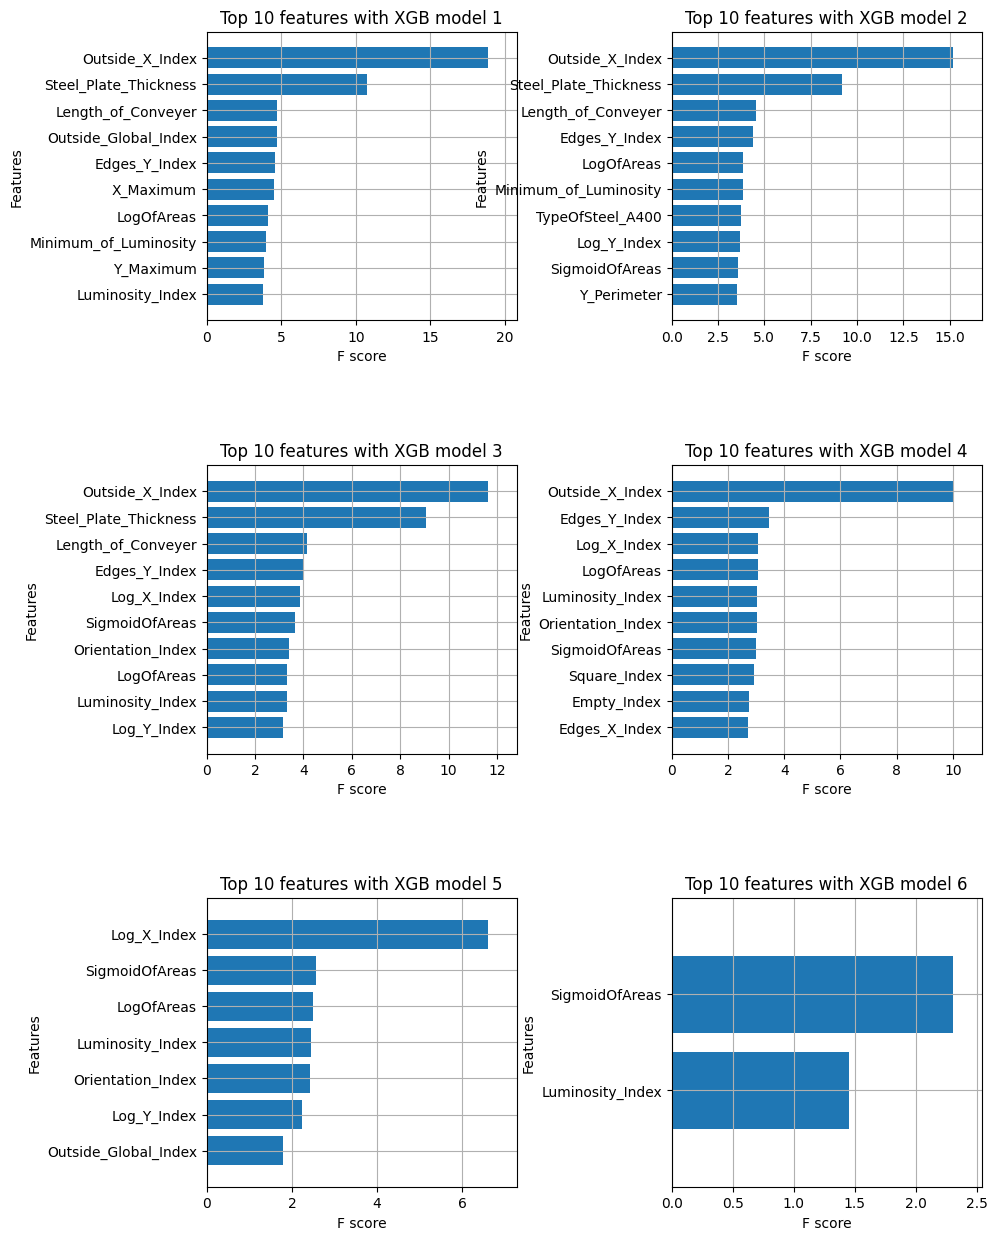

    Completed XGBoost feature selection in 3 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 14 important features:
['Outside_X_Index', 'Steel_Plate_Thickness', 'Empty_Index', 'Edges_Index', 'Minimum_of_Luminosity', 'Length_of_Conveyer', 'Luminosity_Index', 'LogOfAreas', 'Edges_X_Index', 'Square_Index', 'Log_X_Index', 'Orientation_Index', 'SigmoidOfAreas', 'Log_Y_Index']
Total Time taken for featurewiz selection = 3 seconds
Output contains a list of 14 important features and a train dataframe


In [42]:
from featurewiz import featurewiz # automatic feature selection by using featurewiz package
target = 'Other_Faults'
combined_df = pd.concat([x,y], axis=1)
features, train = featurewiz(combined_df, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [43]:
x = x_orig[['Outside_X_Index', 'Steel_Plate_Thickness', 'Empty_Index',
            'Edges_Index', 'Minimum_of_Luminosity', 'Length_of_Conveyer', 'Luminosity_Index', 'LogOfAreas', 
            'Edges_X_Index', 'Square_Index', 'Log_X_Index', 'Orientation_Index', 'SigmoidOfAreas', 'Log_Y_Index']]
def objective(trial):
  # Suggest hyperparameters using trial object
  params = {
      'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.03),
      'max_depth': trial.suggest_int('max_depth', 3, 100,),
      'n_estimators': trial.suggest_int('n_estimators',10,50),
      'max_leaves': trial.suggest_int('max_leaves',10,150)
      # Add other hyperparameters you want to tune
  } #  'n_estimators': trial.suggest_int('n_estimators',10,50)

  # Split data into training and validation sets
  X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

  # Create and train XGBoost model with suggested hyperparameters
  model = XGBClassifier(**params)  # Adjust for regression if needed
  model.fit(X_train, y_train)

  # Make predictions on validation set
  preds = model.predict(X_val)

  # Calculate evaluation metric (e.g., accuracy)
  accuracy = accuracy_score(y_val, preds)

  # Return the negative accuracy (to minimize during optimization)
  return -accuracy



imp_feats = feat_scores.feat_name.values
# x = x_origx[imp_feats]
y = y[['Other_Faults']]
mdl_trainy = mdl_trainy[['Other_Faults']]



study = optuna.create_study(direction="minimize",)

# study.optimize(objective, n_trials=40,n_jobs=-1,)#, show_progress_bar=False,)  # Adjust n_trials as needed
# best_params = study.best_trial.params



mdl_trainx, mdl_validx, mdl_trainy, mdl_validy = train_test_split(x,y, test_size=0.15)#,stratify=target_cols)

model = xgboost.XGBClassifier(max_depth=50,n_estimators=50, max_leaves=100,n_jobs=-1,learning_rate=0.001)
model.fit(mdl_trainx, mdl_trainy)

train_pred = model.predict_proba(mdl_trainx)[:,1]
train_pred

dkt_train_score, train_score =  avg_auc(mdl_trainy, train_pred) # roc_auc_score
train_score, dkt_train_score 

[I 2024-03-07 04:17:47,350] A new study created in memory with name: no-name-06c172d7-fdec-4513-87a7-608ef9fd8e97


(0.7365776257579333, {'Other_Faults': 0.7365776257579333})

In [44]:

train_pred = model.predict_proba(mdl_validx)[:,1]
train_pred

dkt_train_score, train_score =  avg_auc(mdl_validy, train_pred) # roc_auc_score
train_score, dkt_train_score 

(0.6994254169149102, {'Other_Faults': 0.6994254169149102})

# Submission data prediction

In [45]:
scaled_data_submit = pd.DataFrame(scaler.transform(orig_test_df),columns=orig_test_df.columns)

In [46]:

submission_pred = model.predict_proba(scaled_data_submit[imp_feats])
submission_pred

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_18/2754804681.py", line 1, in <module>
    submission_pred = model.predict_proba(scaled_data_submit[imp_feats])
  File "/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py", line 1632, in predict_proba
    X: ArrayLike,
  File "/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py", line 1168, in predict
    except AttributeError as e:
  File "/opt/conda/lib/python3.10/site-packages/xgboost/core.py", line 2418, in inplace_predict
  File "/opt/conda/lib/python3.10/site-packages/xgboost/core.py", line 2970, in _validate_features
ValueError: feature_names mismatch: ['Outside_X_Index', 'Steel_Plate_Thickness', 'Empty_Index', 'Edges_Index', 'Minimum_of_Luminosity', 'Length_of_Conveyer', 'Luminosity_Index', 'LogOfAreas', 'Edges_X_Index', 'Square_Index', 'Log_X_Index

In [ ]:
submission = orig_test_df.reset_index()[['id']]#index
submission[y.columns] = submission_pred
submission = submission[submit_df.columns]
submission

In [ ]:
submission.to_csv('submission.csv',index=False)